In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the datasets
from medmnist import PathMNIST, PneumoniaMNIST

In [ ]:
from medmnist import PneumoniaMNIST
train_dataset_pneumoniamnist = PneumoniaMNIST(split="train", download=True)
x_train_pneumoniamnist, y_train_pneumoniamnist = train_dataset_pneumoniamnist.imgs, train_dataset_pneumoniamnist.labels


Using downloaded and verified file: C:\Users\anees\.medmnist\pneumoniamnist.npz


In [ ]:
# Load PathMNIST dataset
train_dataset_pathmnist = PathMNIST(split="train", download=True)
x_train_pathmnist, y_train_pathmnist = train_dataset_pathmnist.imgs, train_dataset_pathmnist.labels

Using downloaded and verified file: C:\Users\anees\.medmnist\pathmnist.npz


In [ ]:
# Normalize function
def normalize_data(data):
    # Convert to float and normalize to range [0,1]
    data = data.astype('float32') / 255.0
    return data


In [ ]:
# Normalize PathMNIST data
x_train_pathmnist = normalize_data(x_train_pathmnist)

# Normalize PneumoniaMNIST data
x_train_pneumoniamnist = normalize_data(x_train_pneumoniamnist)

In [ ]:
print("Shape of normalized training data for PathMNIST:", x_train_pathmnist.shape, y_train_pathmnist.shape)
print("Shape of normalized training data for PneumoniaMNIST:", x_train_pneumoniamnist.shape, y_train_pneumoniamnist.shape)
print(train_dataset_pneumoniamnist)
print(train_dataset_pathmnist)

Shape of normalized training data for PathMNIST: (89996, 28, 28, 3) (89996, 1)
Shape of normalized training data for PneumoniaMNIST: (4708, 28, 28) (4708, 1)
Dataset PneumoniaMNIST of size 28 (pneumoniamnist)
    Number of datapoints: 4708
    Root location: C:\Users\anees\.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384âˆ’2,916)Ã—(127âˆ’2,713). We center-crop the images and resize them into 1Ã—28Ã—28.
    License: CC BY 4.0
Dataset PathMNIST of size 28 (pathmnist)
    Number of 

In [ ]:
print("Shape of x_train_pathmnist:", x_train_pathmnist.shape)

Shape of x_train_pathmnist: (89996, 28, 28, 3)


PathMNIST


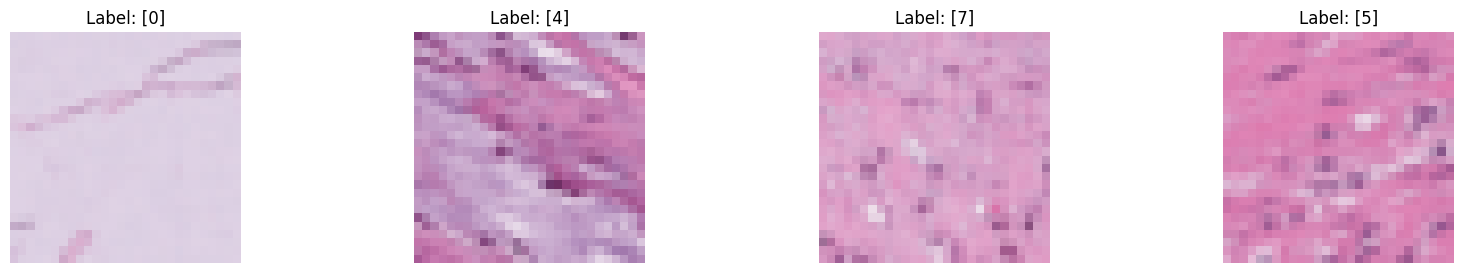

PneumoniaMNIST


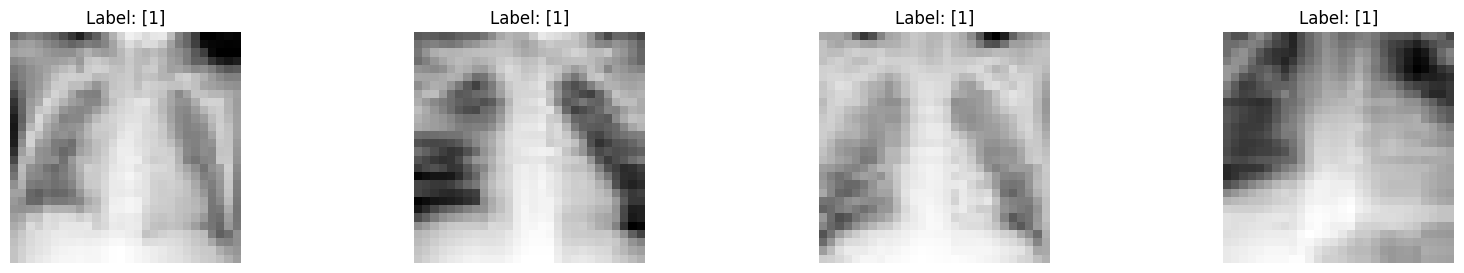

In [ ]:
# Set subset size
subset_size = 4

# Visualize images and their corresponding labels for PathMNIST
print("PathMNIST")
fig, axes = plt.subplots(1, min(subset_size, len(x_train_pathmnist)), figsize=(20, 3))
for i, (image, label) in enumerate(zip(x_train_pathmnist[:subset_size], y_train_pathmnist[:subset_size])):
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')
plt.show()

# Visualize images and their corresponding labels for PneumoniaMNIST
print("PneumoniaMNIST")
fig, axes = plt.subplots(1, min(subset_size, len(x_train_pneumoniamnist)), figsize=(20, 3))
for i, (image, label) in enumerate(zip(x_train_pneumoniamnist[:subset_size], y_train_pneumoniamnist[:subset_size])):
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')
plt.show()

In [ ]:
pip install albumentations

Note: you may need to restart the kernel to use updated packages.


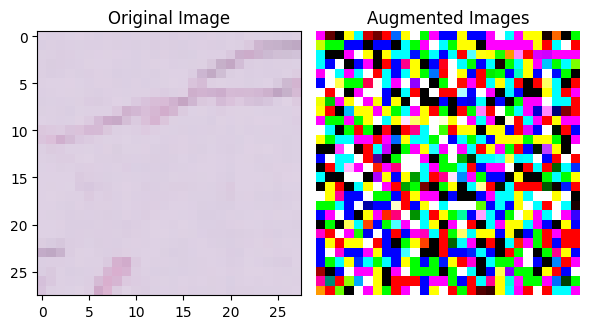

In [ ]:
import albumentations as A

# Define augmentation transformations
transform = A.Compose([
    A.Rotate(limit=10, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=10, p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Blur(blur_limit=3, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
])

# Example of data augmentation on a single image
sample_image = x_train_pathmnist[0]
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title('Original Image')

# Generate augmented images
augmented_images = []
num_augmented_images = 5
for _ in range(num_augmented_images):
    augmented = transform(image=sample_image.squeeze())
    augmented_image = augmented['image']
    augmented_images.append(augmented_image)

# Plot augmented images
plt.subplot(1, 2, 2)
for i, augmented_image in enumerate(augmented_images):
    plt.imshow(augmented_image.squeeze(), cmap='gray')
    plt.title('Augmented Images')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Define x_test_pathmnist
test_dataset_pathmnist = PathMNIST(split="test", download=True)
x_test_pathmnist, y_test_pathmnist = test_dataset_pathmnist.imgs, test_dataset_pathmnist.labels


Using downloaded and verified file: C:\Users\anees\.medmnist\pathmnist.npz


In [ ]:
import numpy as np

# Convert lists to NumPy arrays
x_train_pathmnist = np.array(x_train_pathmnist)
x_test_pathmnist = np.array(x_test_pathmnist)
y_train_pathmnist = np.array(y_train_pathmnist)
y_test_pathmnist = np.array(y_test_pathmnist)

# Verify the shapes of the split datasets
print("Shape of x_train_pathmnist:", x_train_pathmnist.shape)
print("Shape of y_train_pathmnist:", y_train_pathmnist.shape)
print("Shape of x_test_pathmnist:", x_test_pathmnist.shape)
print("Shape of y_test_pathmnist:", y_test_pathmnist.shape)


Shape of x_train_pathmnist: (269988, 28, 28, 1)
Shape of y_train_pathmnist: (89996, 1)
Shape of x_test_pathmnist: (7180, 28, 28, 3)
Shape of y_test_pathmnist: (7180, 1)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


In [ ]:
# Check the shapes after reshaping
print("Shape of x_train_pathmnist after reshaping:", x_train_pathmnist.shape)
print("Shape of x_test_pathmnist after reshaping:", x_test_pathmnist.shape)


Shape of x_train_pathmnist after reshaping: (269988, 28, 28, 1)
Shape of x_test_pathmnist after reshaping: (7180, 28, 28, 3)


In [ ]:
def train_model(model, x_train, y_train, x_test, y_test, num_epochs=10, batch_size=32):
    model.compile(optimizer=Adam(),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test))

    return history


In [ ]:
# Load PneumoniaMNIST dataset for testing
test_dataset_pneumoniamnist = PneumoniaMNIST(split="test", download=True)
x_test_pneumoniamnist, y_test_pneumoniamnist = test_dataset_pneumoniamnist.imgs, test_dataset_pneumoniamnist.labels

# Normalize PneumoniaMNIST test data
x_test_pneumoniamnist = normalize_data(x_test_pneumoniamnist)

# Reshape the PneumoniaMNIST test data to remove the extra dimension
x_test_pneumoniamnist = x_test_pneumoniamnist.reshape(-1, 28, 28, 3)


Using downloaded and verified file: C:\Users\anees\.medmnist\pneumoniamnist.npz


In [ ]:
# Verify input data shapes
print("Shape of x_train_pneumoniamnist:", x_train_pneumoniamnist.shape)
print("Shape of x_test_pneumoniamnist:", x_test_pneumoniamnist.shape)


Shape of x_train_pneumoniamnist: (4708, 28, 28)
Shape of x_test_pneumoniamnist: (208, 28, 28, 3)


In [ ]:
print("Shape of y_test_pathmnist:",y_test_pathmnist.shape)

Shape of y_test_pathmnist: (7180, 1)


In [ ]:
def create_pathmnist_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
def create_pneumoniamnist_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
def train_model(model, x_train, y_train, x_test, y_test, num_epochs=10, batch_size=32):
    model.compile(optimizer=Adam(),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test))

    return history


In [ ]:
# Load PathMNIST dataset
train_dataset_pathmnist = PathMNIST(split="train", download=True)
x_train_pathmnist, y_train_pathmnist = train_dataset_pathmnist.imgs, train_dataset_pathmnist.labels

# Normalize PathMNIST data
x_train_pathmnist = normalize_data(x_train_pathmnist)

# Debugging: Print shapes and sizes
print("Shape of x_train_pathmnist:", x_train_pathmnist.shape)
print("Shape of y_train_pathmnist:", y_train_pathmnist.shape)


Using downloaded and verified file: C:\Users\anees\.medmnist\pathmnist.npz
Shape of x_train_pathmnist: (89996, 28, 28, 3)
Shape of y_train_pathmnist: (89996, 1)


In [ ]:
# PathMNIST models
pathmnist_model_1 = create_pathmnist_model(input_shape=(28, 28, 3), num_classes=9)
pathmnist_history_1 = train_model(pathmnist_model_1, x_train_pathmnist, y_train_pathmnist, x_test_pathmnist, y_test_pathmnist)

pathmnist_model_2 = create_pathmnist_model(input_shape=(28, 28, 3), num_classes=9)
pathmnist_history_2 = train_model(pathmnist_model_2, x_train_pathmnist, y_train_pathmnist, x_test_pathmnist, y_test_pathmnist)


Epoch 1/10
2813/2813 [==============================] - 52s 18ms/step - loss: 1.0384 - accuracy: 0.6111 - val_loss: 3429.6392 - val_accuracy: 0.0830
Epoch 2/10
2813/2813 [==============================] - 49s 17ms/step - loss: 0.6984 - accuracy: 0.7454 - val_loss: 3869.5813 - val_accuracy: 0.1060
Epoch 3/10
2813/2813 [==============================] - 49s 18ms/step - loss: 0.5962 - accuracy: 0.7839 - val_loss: 3948.9412 - val_accuracy: 0.1060
Epoch 4/10
2813/2813 [==============================] - 49s 17ms/step - loss: 0.5295 - accuracy: 0.8069 - val_loss: 4262.1802 - val_accuracy: 0.1045
Epoch 5/10
2813/2813 [==============================] - 48s 17ms/step - loss: 0.4814 - accuracy: 0.8238 - val_loss: 4793.1826 - val_accuracy: 0.1060
Epoch 6/10
2813/2813 [==============================] - 50s 18ms/step - loss: 0.4444 - accuracy: 0.8379 - val_loss: 3058.5977 - val_accuracy: 0.1011
Epoch 7/10
2813/2813 [==============================] - 49s 18ms/step - loss: 0.4111 - accuracy: 0.8499 - 

In [ ]:
# Reshape the PneumoniaMNIST data to remove the extra channel dimension
x_train_pneumoniamnist = x_train_pneumoniamnist.reshape(-1, 28, 28, 1)

# Check the shapes after reshaping
print("Shape of x_train_pneumoniamnist after reshaping:", x_train_pneumoniamnist.shape)

# Load PneumoniaMNIST dataset for testing
test_dataset_pneumoniamnist = PneumoniaMNIST(split="test", download=True)
x_test_pneumoniamnist, y_test_pneumoniamnist = test_dataset_pneumoniamnist.imgs, test_dataset_pneumoniamnist.labels

# Normalize PneumoniaMNIST test data
x_test_pneumoniamnist = normalize_data(x_test_pneumoniamnist)

# Reshape the PneumoniaMNIST test data to remove the extra channel dimension
x_test_pneumoniamnist = x_test_pneumoniamnist.reshape(-1, 28, 28, 1)

# Verify input data shapes
print("Shape of x_train_pneumoniamnist:", x_train_pneumoniamnist.shape)
print("Shape of x_test_pneumoniamnist:", x_test_pneumoniamnist.shape)


Shape of x_train_pneumoniamnist after reshaping: (4708, 28, 28, 1)
Using downloaded and verified file: C:\Users\anees\.medmnist\pneumoniamnist.npz
Shape of x_train_pneumoniamnist: (4708, 28, 28, 1)
Shape of x_test_pneumoniamnist: (624, 28, 28, 1)


In [ ]:
# PneumoniaMNIST models with correct input shape
pneumoniamnist_model_1 = create_pneumoniamnist_model(input_shape=(28, 28, 1), num_classes=2)
pneumoniamnist_history_1 = train_model(pneumoniamnist_model_1, x_train_pneumoniamnist, y_train_pneumoniamnist, x_test_pneumoniamnist, y_test_pneumoniamnist)

pneumoniamnist_model_2 = create_pneumoniamnist_model(input_shape=(28, 28, 1), num_classes=2)
pneumoniamnist_history_2 = train_model(pneumoniamnist_model_2, x_train_pneumoniamnist, y_train_pneumoniamnist, x_test_pneumoniamnist, y_test_pneumoniamnist)


Epoch 1/10
148/148 [==============================] - 5s 24ms/step - loss: 0.3109 - accuracy: 0.8632 - val_loss: 0.3943 - val_accuracy: 0.8462
Epoch 2/10
148/148 [==============================] - 3s 22ms/step - loss: 0.1637 - accuracy: 0.9344 - val_loss: 0.3608 - val_accuracy: 0.8606
Epoch 3/10
148/148 [==============================] - 3s 19ms/step - loss: 0.1419 - accuracy: 0.9444 - val_loss: 0.5095 - val_accuracy: 0.8253
Epoch 4/10
148/148 [==============================] - 3s 20ms/step - loss: 0.1331 - accuracy: 0.9486 - val_loss: 0.5017 - val_accuracy: 0.8349
Epoch 5/10
148/148 [==============================] - 3s 20ms/step - loss: 0.1161 - accuracy: 0.9556 - val_loss: 0.4282 - val_accuracy: 0.8590
Epoch 6/10
148/148 [==============================] - 3s 20ms/step - loss: 0.1146 - accuracy: 0.9545 - val_loss: 0.6295 - val_accuracy: 0.8109
Epoch 7/10
148/148 [==============================] - 3s 20ms/step - loss: 0.0995 - accuracy: 0.9637 - val_loss: 0.5181 - val_accuracy: 0.8221

In [ ]:
from keras.layers import Dense

def create_pathmnist_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Change the number of units to num_classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Adjust the number of classes based on your dataset
num_classes_pathmnist = 9

# Create the PathMNIST model with the corrected output layer
pathmnist_model = create_pathmnist_model(input_shape=input_shape_pathmnist, num_classes=num_classes_pathmnist)

# Print the model summary
pathmnist_model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1600)              0         
                                                                 
 dense_22 (Dense)            (None, 128)             

In [ ]:
import os
import cv2

# Create a directory to store resized images
output_dir = "resized_images"
os.makedirs(output_dir, exist_ok=True)

# Define batch size and desired shape
batch_size = 1000
desired_shape = (28, 28)

# Iterate over the original dataset in batches
num_batches = len(x_train_pathmnist) // batch_size
for i in range(num_batches):
    batch_start = i * batch_size
    batch_end = min((i + 1) * batch_size, len(x_train_pathmnist))

    # Resize each batch of images
    resized_images = [cv2.resize(img, desired_shape) for img in x_train_pathmnist[batch_start:batch_end]]

    # Save resized images to disk
    for j, resized_image in enumerate(resized_images):
        filename = os.path.join(output_dir, f"image_{batch_start + j}.png")
        cv2.imwrite(filename, resized_image)

    print(f"Processed {batch_end} images")

# Resize remaining images (if any)
if num_batches * batch_size < len(x_train_pathmnist):
    remaining_images = x_train_pathmnist[num_batches * batch_size:]
    resized_remaining_images = [cv2.resize(img, desired_shape) for img in remaining_images]

    for j, resized_image in enumerate(resized_remaining_images):
        filename = os.path.join(output_dir, f"image_{num_batches * batch_size + j}.png")
        cv2.imwrite(filename, resized_image)

    print(f"Processed {len(x_train_pathmnist)} images")

print("Resizing complete.")


Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
Processed 6000 images
Processed 7000 images
Processed 8000 images
Processed 9000 images
Processed 10000 images
Processed 11000 images
Processed 12000 images
Processed 13000 images
Processed 14000 images
Processed 15000 images
Processed 16000 images
Processed 17000 images
Processed 18000 images
Processed 19000 images
Processed 20000 images
Processed 21000 images
Processed 22000 images
Processed 23000 images
Processed 24000 images
Processed 25000 images
Processed 26000 images
Processed 27000 images
Processed 28000 images
Processed 29000 images
Processed 30000 images
Processed 31000 images
Processed 32000 images
Processed 33000 images
Processed 34000 images
Processed 35000 images
Processed 36000 images
Processed 37000 images
Processed 38000 images
Processed 39000 images
Processed 40000 images
Processed 41000 images
Processed 42000 images
Processed 43000 images
Processed 44000 imag

In [ ]:
x_train_pathmnist_resized = np.array(resized_images)

In [ ]:
# Create the PathMNIST model with the corrected input shape
pathmnist_model = create_pathmnist_model(input_shape=input_shape_pathmnist, num_classes=num_classes_pathmnist)

# Build the model
pathmnist_model.build(input_shape=(None,) + input_shape_pathmnist)

# Print the summary of the model
pathmnist_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 1600)              0         
                                                                 
 dense_28 (Dense)            (None, 128)             

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Train the CNN model
def train_model(model, x_train, y_train, x_test, y_test, num_epochs=10, batch_size=32):
    model.compile(optimizer=Adam(),
                  loss=SparseCategoricalCrossentropy(reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test))

    return history

# Reshape the PneumoniaMNIST and PathMNIST data to remove the extra dimension
x_train_pneumoniamnist = x_train_pneumoniamnist.reshape(-1, 28, 28, 1)
x_train_pathmnist = x_train_pathmnist.reshape(-1, 28, 28, 3)

# Split the PneumoniaMNIST and PathMNIST data into train and test sets
x_train_pneumoniamnist, x_test_pneumoniamnist, y_train_pneumoniamnist, y_test_pneumoniamnist = train_test_split(
    x_train_pneumoniamnist, y_train_pneumoniamnist, test_size=0.2, random_state=42)
x_train_pathmnist, x_test_pathmnist, y_train_pathmnist, y_test_pathmnist = train_test_split(
    x_train_pathmnist, y_train_pathmnist, test_size=0.2, random_state=42)

# Create and train the PneumoniaMNIST model
pneumoniamnist_model = create_pneumoniamnist_model(input_shape=(28, 28, 1), num_classes=2)
pneumoniamnist_history = train_model(pneumoniamnist_model, x_train_pneumoniamnist, y_train_pneumoniamnist,
                                     x_test_pneumoniamnist, y_test_pneumoniamnist)

# Create and train the PathMNIST model
pathmnist_model = create_pathmnist_model(input_shape=(28, 28, 3), num_classes=9)
pathmnist_history = train_model(pathmnist_model, x_train_pathmnist, y_train_pathmnist,
                                x_test_pathmnist, y_test_pathmnist)

with h5py.File('y_train_pneumoniamnist.h5', 'w') as hf:
    hf.create_dataset('y_train_pneumoniamnist', data=y_train_pneumoniamnist)


# Save the entire trained PneumoniaMNIST model
pneumoniamnist_model.save('pneumoniamnist_model.h5')

# Save the entire trained PathMNIST model
pathmnist_model.save('pathmnist_model.h5')

Epoch 1/10
76/76 [==============================] - 3s 29ms/step - loss: 0.4205 - accuracy: 0.8024 - val_loss: 0.2617 - val_accuracy: 0.8823
Epoch 2/10
76/76 [==============================] - 2s 23ms/step - loss: 0.2327 - accuracy: 0.9099 - val_loss: 0.2130 - val_accuracy: 0.9270
Epoch 3/10
76/76 [==============================] - 2s 24ms/step - loss: 0.1845 - accuracy: 0.9228 - val_loss: 0.1668 - val_accuracy: 0.9353
Epoch 4/10
76/76 [==============================] - 2s 21ms/step - loss: 0.1642 - accuracy: 0.9377 - val_loss: 0.1511 - val_accuracy: 0.9469
Epoch 5/10
76/76 [==============================] - 1s 20ms/step - loss: 0.1538 - accuracy: 0.9398 - val_loss: 0.1477 - val_accuracy: 0.9502
Epoch 6/10
76/76 [==============================] - 2s 20ms/step - loss: 0.1321 - accuracy: 0.9485 - val_loss: 0.1793 - val_accuracy: 0.9287
Epoch 7/10
76/76 [==============================] - 1s 19ms/step - loss: 0.1251 - accuracy: 0.9485 - val_loss: 0.1327 - val_accuracy: 0.9502
Epoch 8/10
76

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.losses import SparseCategoricalCrossentropy

# Define the model architecture
pneumoniamnist_model = Sequential()
pneumoniamnist_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
pneumoniamnist_model.add(MaxPooling2D((2, 2)))
pneumoniamnist_model.add(Conv2D(64, (3, 3), activation='relu'))
pneumoniamnist_model.add(MaxPooling2D((2, 2)))
pneumoniamnist_model.add(Conv2D(64, (3, 3), activation='relu'))
pneumoniamnist_model.add(Flatten())
pneumoniamnist_model.add(Dense(64, activation='relu'))
pneumoniamnist_model.add(Dense(2, activation='softmax'))

# Compile the model with the custom loss function
pneumoniamnist_model.compile(optimizer='adam',
                            loss=SparseCategoricalCrossentropy(reduction='sum_over_batch_size'),
                            metrics=['accuracy'])

In [ ]:
# Save the entire trained PneumoniaMNIST model
pneumoniamnist_model.save('pneumoniamnist_model.h5')
# Save the entire trained PathMNIST model
pathmnist_model.save('pathmnist_model.h5')


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate PneumoniaMNIST model
pneumoniamnist_predictions = pneumoniamnist_model.predict(x_test_pneumoniamnist)
pneumoniamnist_predictions_classes = np.argmax(pneumoniamnist_predictions, axis=1)

# Calculate metrics
pneumoniamnist_accuracy = accuracy_score(y_test_pneumoniamnist, pneumoniamnist_predictions_classes)
pneumoniamnist_precision = precision_score(y_test_pneumoniamnist, pneumoniamnist_predictions_classes)
pneumoniamnist_recall = recall_score(y_test_pneumoniamnist, pneumoniamnist_predictions_classes)
pneumoniamnist_f1 = f1_score(y_test_pneumoniamnist, pneumoniamnist_predictions_classes)
pneumoniamnist_confusion = confusion_matrix(y_test_pneumoniamnist, pneumoniamnist_predictions_classes)

# Display metrics
print("PneumoniaMNIST Model Metrics:")
print(f"Accuracy: {pneumoniamnist_accuracy}")
print(f"Precision: {pneumoniamnist_precision}")
print(f"Recall: {pneumoniamnist_recall}")
print(f"F1 Score: {pneumoniamnist_f1}")
print("Confusion Matrix:")
print(pneumoniamnist_confusion)



24/24 [==============================] - 1s 12ms/step
PneumoniaMNIST Model Metrics:
Accuracy: 0.7599469496021221
Precision: 0.7599469496021221
Recall: 1.0
F1 Score: 0.8636021100226074
Confusion Matrix:
[[  0 181]
 [  0 573]]


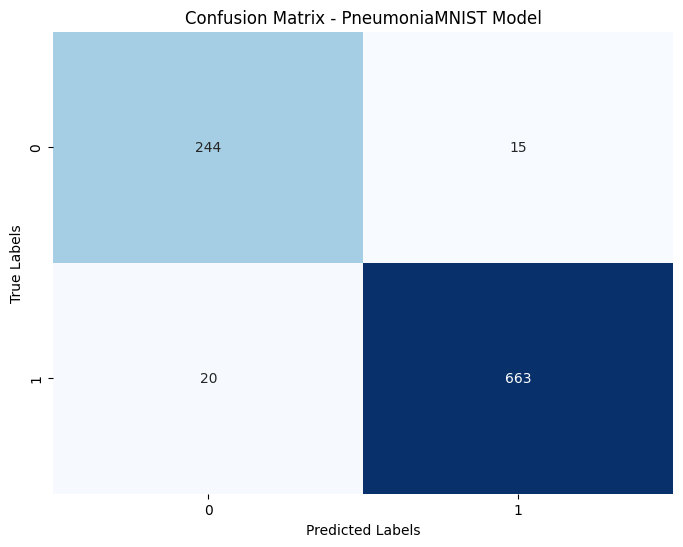

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for PneumoniaMNIST model
plt.figure(figsize=(8, 6))
sns.heatmap(pneumoniamnist_confusion, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - PneumoniaMNIST Model')
plt.show()


In [ ]:
# Evaluate PathMNIST model
pathmnist_predictions = pathmnist_model.predict(x_test_pathmnist)
pathmnist_predictions_classes = np.argmax(pathmnist_predictions, axis=1)

# Calculate metrics
pathmnist_accuracy = accuracy_score(y_test_pathmnist, pathmnist_predictions_classes)
pathmnist_precision = precision_score(y_test_pathmnist, pathmnist_predictions_classes, average='weighted')
pathmnist_recall = recall_score(y_test_pathmnist, pathmnist_predictions_classes, average='weighted')
pathmnist_f1 = f1_score(y_test_pathmnist, pathmnist_predictions_classes, average='weighted')
pathmnist_confusion = confusion_matrix(y_test_pathmnist, pathmnist_predictions_classes)

# Display metrics
print("PathMNIST Model Metrics:")
print(f"Accuracy: {pathmnist_accuracy}")
print(f"Precision: {pathmnist_precision}")
print(f"Recall: {pathmnist_recall}")
print(f"F1 Score: {pathmnist_f1}")
print("Confusion Matrix:")
print(pathmnist_confusion)


563/563 [==============================] - 4s 7ms/step
PathMNIST Model Metrics:
Accuracy: 0.8401666666666666
Precision: 0.8452683797094226
Recall: 0.8401666666666666
F1 Score: 0.8408013789981308
Confusion Matrix:
[[1787    4    0    0   42    5    1    1    0]
 [  86 1858   12    0   49    0    0    1    0]
 [   2    4 1429    9   18  203    7  253   69]
 [   0    0   20 1983    8    0   22   13   25]
 [  37    9    8    1 1370   27   32   86   13]
 [  21    2   61    0   17 2077    0  259    4]
 [   8    0   25   43  149   20 1143   30  164]
 [   1    1  170    1   32  386    6 1287   20]
 [   0    0  120   32   43   30   45  120 2189]]


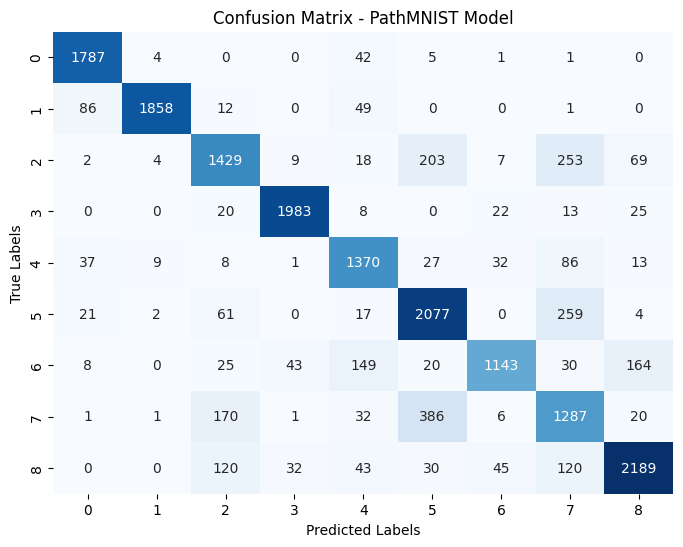

In [ ]:
# Plot confusion matrix for PathMNIST model
plt.figure(figsize=(8, 6))
sns.heatmap(pathmnist_confusion, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - PathMNIST Model')
plt.show()


In [1]:
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Conv2D,GlobalAveragePooling2D, MaxPooling2D, Dropout, BatchNormalization
from keras.optimizers import Adam
import numpy as np
import os
import requests
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.applications import VGG16
import cv2
from tensorflow.keras.utils import to_categorical

In [3]:
# Function to load PneumoniaMNIST data and formating labels for binary classification
def load_pneumoniamnist_data():
    # Defining the URL to download the PneumoniaMNIST dataset
    url = 'https://zenodo.org/record/4269852/files/pneumoniamnist.npz?download=1'

    # Defining the output folder
    output_folder = 'data_pneumonia'

    # Creating the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Downloading the dataset
    r = requests.get(url, allow_redirects=True)
    open(os.path.join(output_folder, 'pneumoniamnist.npz'), 'wb').write(r.content)

    # Loading the .npz file
    npz_file = np.load(os.path.join(output_folder, 'pneumoniamnist.npz'), allow_pickle=True)

    # Extracting the images and labels from the .npz file
    train_images = npz_file['train_images']
    train_labels = npz_file['train_labels']
    test_images = npz_file['test_images']
    test_labels = npz_file['test_labels']
    val_images = npz_file['test_images']
    val_labels = npz_file['test_labels']

    # Normalizing the images to values between 0 and 1
    train_images = train_images.astype('float32') / 255.0

    return train_images, train_labels, test_images, test_labels, val_images, val_labels

# Loading PneumoniaMNIST data
train_images_pneumoniamnist, train_labels_pneumoniamnist, test_images_pneumoniamnist, test_labels_pneumoniamnist, val_images_pneumoniamnist, val_labels_pneumoniamnist = load_pneumoniamnist_data()

# Printing the shapes to verify
print("Train Data Shape after preprocessing:", train_images_pneumoniamnist.shape)
print("Test Data Shape after preprocessing:", test_images_pneumoniamnist.shape)

# Ensuring the shape of the images matches the expected input shape of the models
input_shape_pneumoniamnist = train_images_pneumoniamnist[0].shape


Train Data Shape after preprocessing: (4708, 28, 28)
Test Data Shape after preprocessing: (624, 28, 28)


In [ ]:
def load_pathmnist_data():
    # Defining the URL to download the PneumoniaMNIST dataset
    url = 'https://zenodo.org/record/4269852/files/pathmnist.npz'

    # Defining the output folder
    output_folder = 'data_path'

    # Creating the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Downloading the dataset
    r = requests.get(url, allow_redirects=True)
    open(os.path.join(output_folder, 'pathmnist.npz'), 'wb').write(r.content)

    # Loading the .npz file
    npz_file = np.load(os.path.join(output_folder, 'pathmnist.npz'), allow_pickle=True)

    # Extracting the images and labels from the .npz file
    train_images = npz_file['train_images']
    train_labels = npz_file['train_labels']
    test_images = npz_file['test_images']
    test_labels = npz_file['test_labels']
    val_images = npz_file['val_images']
    val_labels = npz_file['val_labels']

    # Normalizing the images to values between 0 and 1
    train_images = train_images.astype('float32') / 255.0

    return train_images, train_labels, test_images, test_labels, val_images, val_labels

# Loading PathMNIST data
train_images_pathmnist, train_labels_pathmnist, test_images_pathmnist, test_labels_pathmnist, val_images_pathmnist, val_labels_pathmnist = load_pathmnist_data()

unique = np.unique(test_labels_pathmnist)
print(unique)

# Printing the shapes to verify
print("Train Data Shape after preprocessing:", train_images_pathmnist.shape)
print("Test Data Shape after preprocessing:", test_images_pathmnist.shape)


[0 1 2 3 4 5 6 7 8]
Train Data Shape after preprocessing: (89996, 28, 28, 3)
Test Data Shape after preprocessing: (7180, 28, 28, 3)


In [ ]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

# Defining the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by up to 10% of the width
    height_shift_range=0.1, # Randomly shift images vertically by up to 10% of the height
    shear_range=0.2,        # Shear angle in counter-clockwise direction in radians
    zoom_range=0.2,         # Random zoom up to 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    vertical_flip=False,    # Do not flip images vertically
    fill_mode='nearest'     # Strategy for filling in newly created pixels
)

# Fitting the ImageDataGenerator to the training data for both the datasets
datagen.fit(train_images_pneumoniamnist.reshape(-1, 28, 28, 1))
datagen.fit(train_images_pathmnist.reshape(-1, 28, 28, 3))
datagen.fit(test_images_pathmnist.reshape(-1, 28, 28, 3))



In [9]:
# Class weight for PneumoniaMNIST dataset

# Converting multidimensional array into a one-dimensional array
train_labels_flat_pneumoniamnist = train_labels_pneumoniamnist.flatten()

# Computing class weights manually for PneumoniaMNIST dataset
class_counts_pneumoniamnist = np.bincount(train_labels_flat_pneumoniamnist)
total_samples_pneumoniamnist = np.sum(class_counts_pneumoniamnist)
class_weights_pneumoniamnist = total_samples_pneumoniamnist / (len(class_counts_pneumoniamnist) * class_counts_pneumoniamnist)

# Converting class weights to dictionary format
class_weight_pneumoniamnist = {i: weight for i, weight in enumerate(class_weights_pneumoniamnist)}

print("Computed class weights for PneumoniaMNIST dataset:", class_weight_pneumoniamnist)

Computed class weights for PneumoniaMNIST dataset: {0: 1.9390444810543657, 1: 0.6737263880938752}


In [10]:
# Define the function to compile the model for pneumoniamnist
def compile_model_pneumoniamnist(model):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

def compile_model_path(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Define the custom loss function to avoid negative values
def custom_loss(y_true, y_pred):
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) + tf.keras.backend.epsilon()


In [20]:
# Creating and compiling DNN model 2 for PneumoniaMNIST
model_pneumoniamnist_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)), # Adding MaxPooling2D layer to downsample the inputs
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
compile_model_pneumoniamnist(model_pneumoniamnist_2)


In [21]:
# Training model_pneumoniamnist_1
model_pneumoniamnist_2.fit(train_images_pneumoniamnist, train_labels_pneumoniamnist, class_weight = class_weight_pneumoniamnist, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
118/118 [==============================] - 5s 35ms/step - loss: 0.3350 - accuracy: 0.8529 - val_loss: 0.2104 - val_accuracy: 0.9225
Epoch 2/10
118/118 [==============================] - 5s 42ms/step - loss: 0.1874 - accuracy: 0.9187 - val_loss: 0.2202 - val_accuracy: 0.9140
Epoch 3/10
118/118 [==============================] - 4s 33ms/step - loss: 0.1679 - accuracy: 0.9299 - val_loss: 0.1247 - val_accuracy: 0.9533
Epoch 4/10
118/118 [==============================] - 4s 33ms/step - loss: 0.1428 - accuracy: 0.9392 - val_loss: 0.1182 - val_accuracy: 0.9544
Epoch 5/10
118/118 [==============================] - 5s 42ms/step - loss: 0.1368 - accuracy: 0.9448 - val_loss: 0.1560 - val_accuracy: 0.9469
Epoch 6/10
118/118 [==============================] - 4s 32ms/step - loss: 0.1169 - accuracy: 0.9541 - val_loss: 0.1128 - val_accuracy: 0.9628
Epoch 7/10
118/118 [==============================] - 4s 33ms/step - loss: 0.1190 - accuracy: 0.9543 - val_loss: 0.1035 - val_accuracy: 0.9671

In [22]:
# Evaluate PneumoniaMNIST models
print("Evaluation for PneumoniaMNIST models:")
print("Model 2:")
loss_3, accuracy_3 = model_pneumoniamnist_2.evaluate(test_images_pneumoniamnist, test_labels_pneumoniamnist)
print(f"Test Accuracy: {accuracy_3}, Test Loss: {loss_3}")

Evaluation for PneumoniaMNIST models:
Model 2:
20/20 [==============================] - 1s 20ms/step - loss: 185.0454 - accuracy: 0.7933
Test Accuracy: 0.7932692170143127, Test Loss: 185.04544067382812


In [24]:
# Computing additional evaluation metrics

# PneumoniaMNIST
predictions_pneumoniamnist_2 = (model_pneumoniamnist_2.predict(test_images_pneumoniamnist) > 0.5).astype("int32")

print("Additional evaluation metrics for PneumoniaMNIST models:")
print("Model 2:")
print(classification_report(test_labels_pneumoniamnist, predictions_pneumoniamnist_2))



20/20 [==============================] - 0s 14ms/step
Additional evaluation metrics for PneumoniaMNIST models:
Model 2:
              precision    recall  f1-score   support

           0       0.96      0.47      0.63       234
           1       0.76      0.99      0.86       390

    accuracy                           0.79       624
   macro avg       0.86      0.73      0.74       624
weighted avg       0.83      0.79      0.77       624



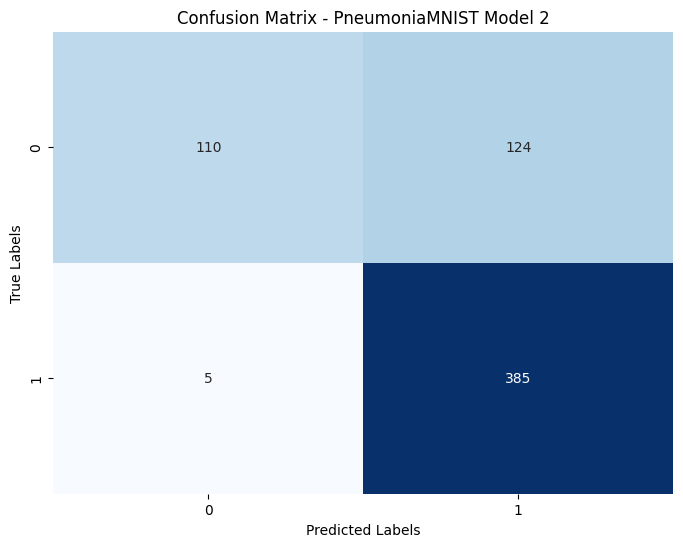

In [25]:
# Computing confusion matrices

conf_matrix_pneumoniamnist_2 = confusion_matrix(test_labels_pneumoniamnist, predictions_pneumoniamnist_2)

# Plot confusion matrices

import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for PneumoniaMNIST model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pneumoniamnist_2, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - PneumoniaMNIST Model 2')
plt.show()

Epoch 1/10
118/118 [==============================] - 280s 2s/step - loss: 0.6176 - accuracy: 0.7151 - val_loss: 0.5892 - val_accuracy: 0.7251
Epoch 2/10
118/118 [==============================] - 285s 2s/step - loss: 0.5694 - accuracy: 0.7464 - val_loss: 0.5882 - val_accuracy: 0.7251
Epoch 3/10
118/118 [==============================] - 294s 2s/step - loss: 0.5708 - accuracy: 0.7464 - val_loss: 0.5931 - val_accuracy: 0.7251
Epoch 4/10
118/118 [==============================] - 287s 2s/step - loss: 0.5741 - accuracy: 0.7464 - val_loss: 0.5939 - val_accuracy: 0.7251
Epoch 5/10
118/118 [==============================] - 294s 2s/step - loss: 0.5700 - accuracy: 0.7464 - val_loss: 0.5910 - val_accuracy: 0.7251
Epoch 6/10
118/118 [==============================] - 281s 2s/step - loss: 0.5720 - accuracy: 0.7464 - val_loss: 0.5876 - val_accuracy: 0.7251
Epoch 7/10
118/118 [==============================] - 285s 2s/step - loss: 0.5689 - accuracy: 0.7464 - val_loss: 0.5877 - val_accuracy: 0.7251

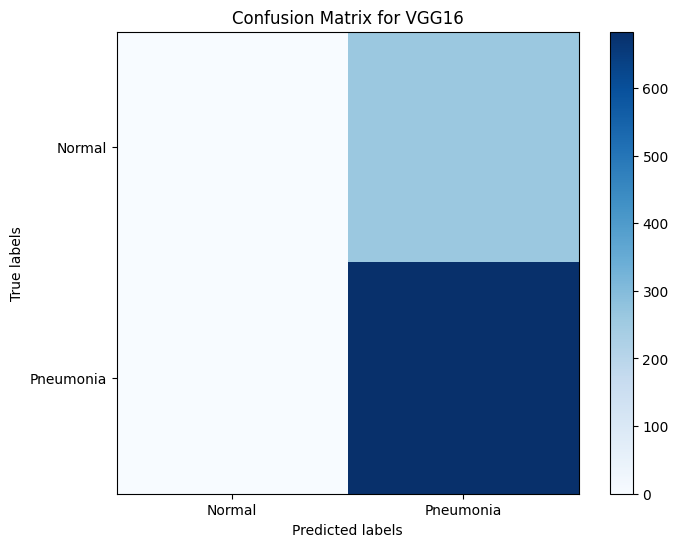

In [ ]:
from keras.applications import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from sklearn.metrics import f1_score, confusion_matrix

# Load the VGG16 model without the top layers (include_top=False)
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model_vgg.layers:
    layer.trainable = False

# Add custom top layers for classification
x = GlobalAveragePooling2D()(base_model_vgg.output)
x = Dense(128, activation='relu')(x)
predictions_vgg = Dense(1, activation='sigmoid')(x)

# Combine the base model with custom top layers
model_vgg = Model(inputs=base_model_vgg.input, outputs=predictions_vgg)

# Compile the model
model_vgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the VGG16 model
history_vgg = model_vgg.fit(train_images_resized, train_labels_pneumoniamnist, epochs=10, batch_size=32, validation_data=(test_images_resized, test_labels_pneumoniamnist))

# Evaluate the VGG16 model on test data
loss_vgg, accuracy_vgg = model_vgg.evaluate(test_images_resized, test_labels_pneumoniamnist)
print("Evaluation for VGG16 model:")
print(f"Test Accuracy: {accuracy_vgg}, Test Loss: {loss_vgg}")

# Make predictions with VGG16 model
predictions_vgg = (model_vgg.predict(test_images_resized) > 0.5).astype("int32")

# Calculate F1 score for VGG16 model
f1_score_vgg = f1_score(test_labels_pneumoniamnist, predictions_vgg)
print("F1 Score for VGG16 model:", f1_score_vgg)

# Generate confusion matrix for VGG16 model
conf_matrix_vgg = confusion_matrix(test_labels_pneumoniamnist, predictions_vgg)

# Plot confusion matrix for VGG16 model
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_vgg, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Normal', 'Pneumonia'])
plt.yticks([0, 1], ['Normal', 'Pneumonia'])
plt.title('Confusion Matrix for VGG16')
plt.colorbar()
plt.show()


In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix

# Define the folder path
folder_path = r"C:\Users\anees\OneDrive - Kingston University\Desktop\cw2"

# Save history_vgg inside the folder
with open(os.path.join(folder_path, 'history_vgg.pkl'), 'wb') as f:
    pickle.dump(history_vgg.history, f)

# Save predictions_vgg inside the folder
with open(os.path.join(folder_path, 'predictions_vgg.pkl'), 'wb') as f:
    pickle.dump(predictions_vgg, f)

# Save conf_matrix_vgg inside the folder
with open(os.path.join(folder_path, 'conf_matrix_vgg.pkl'), 'wb') as f:
    pickle.dump(conf_matrix_vgg, f)


Epoch 1/10
1875/1875 [==============================] - 4061s 2s/step - loss: -337925.9688 - accuracy: 0.1124 - val_loss: -967321.9375 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 4025s 2s/step - loss: -2081255.2500 - accuracy: 0.1124 - val_loss: -3369814.0000 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 4441s 2s/step - loss: -5056785.0000 - accuracy: 0.1124 - val_loss: -6853742.5000 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 4559s 2s/step - loss: -9071317.0000 - accuracy: 0.1124 - val_loss: -11329221.0000 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 3868s 2s/step - loss: -14036582.0000 - accuracy: 0.1124 - val_loss: -16725644.0000 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 3854s 2s/step - loss: -19927512.0000 - accuracy: 0.1124 - val_loss: -23039750.0000 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [===============

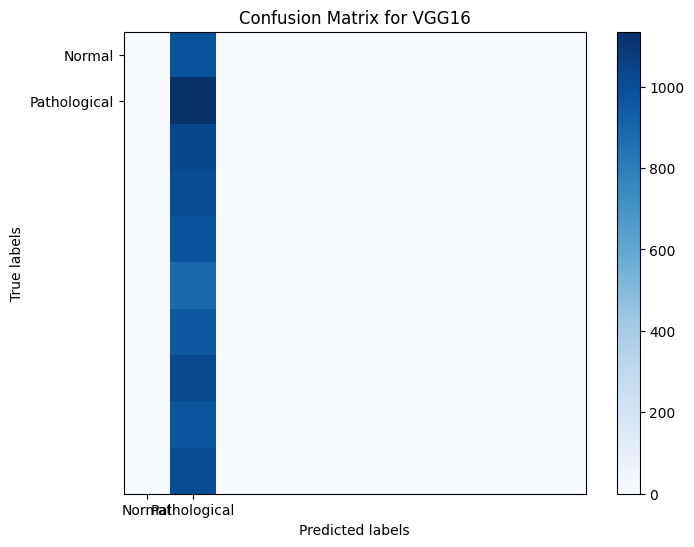

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
import numpy as np
import os
import requests
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Define the function to load PathMNIST data
def load_pathmnist_data():
    # Load PathMNIST data
    (train_images_pathmnist, train_labels_pathmnist), (test_images_pathmnist, test_labels_pathmnist) = tf.keras.datasets.mnist.load_data()

    # Normalize images
    train_images_pathmnist = train_images_pathmnist / 255.0
    test_images_pathmnist = test_images_pathmnist / 255.0

    # Reshape images
    train_images_pathmnist = train_images_pathmnist.reshape((-1, 28, 28, 1))
    test_images_pathmnist = test_images_pathmnist.reshape((-1, 28, 28, 1))

    return train_images_pathmnist, train_labels_pathmnist, test_images_pathmnist, test_labels_pathmnist

# Load PathMNIST data
train_images_pathmnist, train_labels_pathmnist, test_images_pathmnist, test_labels_pathmnist = load_pathmnist_data()

# Modify the load_and_preprocess_images function
def load_and_preprocess_images(image_arrays):
    images = []
    for img_array in image_arrays:
        img_array = (img_array * 255).astype(np.uint8)  # Convert to uint8
        img_array = np.squeeze(img_array, axis=-1)  # Remove the single channel dimension
        img = resize_and_convert_to_rgb(img_array)
        images.append(img)
    return np.array(images)

def resize_and_convert_to_rgb(img_array, size=(224, 224)):
    img = Image.fromarray(img_array, mode='L')  # Specify mode='L' for grayscale images
    img = img.convert('RGB')  # Convert to RGB format
    img = img.resize(size)
    return np.array(img)


# Convert PathMNIST images to RGB format
train_images_pathmnist_rgb = load_and_preprocess_images(train_images_pathmnist)
test_images_pathmnist_rgb = load_and_preprocess_images(test_images_pathmnist)

# Define the VGG16 model
from keras.applications import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

# Load the VGG16 model without the top layers (include_top=False)
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model_vgg.layers:
    layer.trainable = False

# Add custom top layers for classification
x = GlobalAveragePooling2D()(base_model_vgg.output)
x = Dense(128, activation='relu')(x)
predictions_vgg = Dense(1, activation='sigmoid')(x)

# Combine the base model with custom top layers
model_vgg = Model(inputs=base_model_vgg.input, outputs=predictions_vgg)

# Compile the model
model_vgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the VGG16 model
history_vgg = model_vgg.fit(train_images_pathmnist_rgb, train_labels_pathmnist, epochs=10, batch_size=32, validation_data=(test_images_pathmnist_rgb, test_labels_pathmnist))

# Evaluate the VGG16 model on test data
loss_vgg, accuracy_vgg = model_vgg.evaluate(test_images_pathmnist_rgb, test_labels_pathmnist)
print("Evaluation for VGG16 model:")
print(f"Test Accuracy: {accuracy_vgg}, Test Loss: {loss_vgg}")

# Make predictions with VGG16 model
predictions_vgg = (model_vgg.predict(test_images_pathmnist_rgb) > 0.5).astype("int32")

# Generate confusion matrix for VGG16 model
conf_matrix_vgg = confusion_matrix(test_labels_pathmnist, predictions_vgg)

# Plot confusion matrix for VGG16 model
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_vgg, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Normal', 'Pathological'])  # Corrected labels
plt.yticks([0, 1], ['Normal', 'Pathological'])  # Corrected labels
plt.title('Confusion Matrix for VGG16')
plt.colorbar()
plt.show()
